<br>
<br>
<hr style="border:2px solid blue"> </hr>

### Robust Models with a Student's t-Distribution

Issues with assuming a Gaussian distribution is the assumption of finite variance. When you have observed data that lies outside this 'boundary', a Gaussian distribution is not a good fit, PyMC and other MCMC-based tools will be unable to reconcile these differences appropriately.

This distribution is parameterized by the following:

* μ corresponds to the mean of the distribution
    
* σ is the scale and corresponds roughly to the standard deviation

* ν is the degrees of freedom and takes values between 0 and $\infty$. The degrees of freedom corresponds to the number of independent observations minus 1. When the sample size is 8, the t-distribution used to model this would have degrees of freedom set to 7. A value of 1 corresponds to the Cauchy distribution and indicates heavy tails, while infinity corresponds to a Normal distribution.

The probability density function for a zero-centered Student's t-distribution with scale set to one is given by:

$p(t) = \dfrac{\gamma ((v+1) / 2)}{\sqrt{v \pi} \gamma (v/2)} (1 + \dfrac{t^2}{v})^{-(v+1)/2}$

In this case, the mean of the distribution is 0 and the variance is given by ν/(ν - 2).

Now let us model the same problem with this distribution instead of a Normal.


In [2]:
import arviz as az
import numpy as np
import matplotlib.pyplot as plt
import graphviz
import os
import pymc as pm

In [4]:
data = np.array([55.12, 53.73, 50.24, 52.05, 56.4 , 48.45, 52.34, 55.65, 51.49,
       51.86, 63.43, 53.  , 56.09, 51.93, 52.31, 52.33, 57.48, 57.44,
       55.14, 53.93, 54.62, 56.09, 68.58, 51.36, 55.47, 50.73, 51.94,
       54.95, 50.39, 52.91, 51.5 , 52.68, 47.72, 49.73, 51.82, 54.99,
       52.84, 53.19, 54.52, 51.46, 53.73, 51.61, 49.81, 52.42, 54.3 ,
       53.84, 53.16])

Output()

Output()

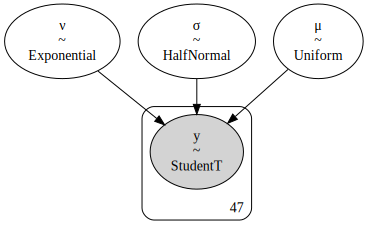

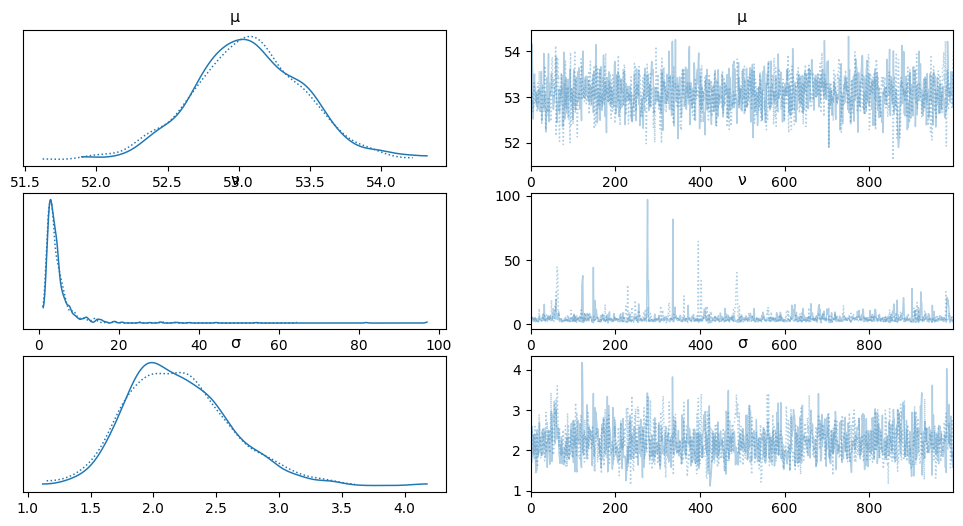

In [5]:
with pm.Model() as model_t:
    μ = pm.Uniform('μ', 40, 75) # mean
    σ = pm.HalfNormal('σ', sigma=10)
    ν = pm.Exponential('ν', 1/40)
    y = pm.StudentT('y', mu=μ, sigma=σ, nu=ν, observed=data)
    trace_g = pm.sample(draws=1000, tune = 1000, target_accept = 0.9)

az.plot_trace(trace_g, figsize=(12, 6))
pm.model_to_graphviz(model_t)

Using a student's t-distribution we notice that the outliers are captured more accurately now and the model fits better.

Output()

(40.0, 70.0)

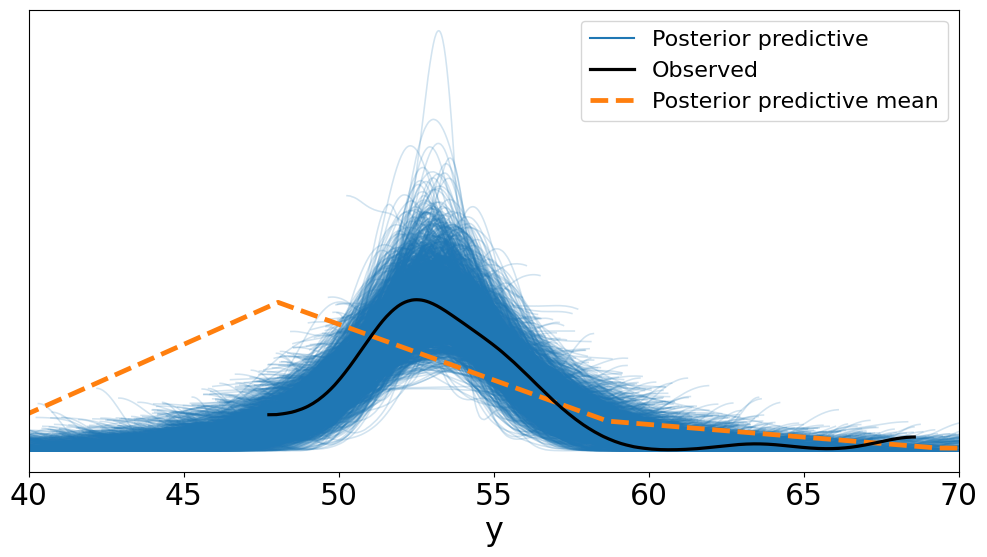

In [6]:
# Using a student's t distribution we notice that the outliers are captured more
# accurately now and the model fits better
y_ppc_t = pm.sample_posterior_predictive(trace_g,model_t)
y_pred_t = az.plot_ppc(y_ppc_t, figsize=(12, 6), mean=True)
plt.xlim(40, 70)